# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [3]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

In [4]:
diabetes_df.shape

(768, 9)

Check the top 5 samples of the data

In [5]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
672,10,68,106,23,49,35.5,0.285,47,0
313,3,113,50,10,85,29.5,0.626,25,0
218,5,85,74,22,0,29.0,1.224,32,1
757,0,123,72,0,0,36.3,0.258,52,1
642,6,147,80,0,0,29.5,0.178,50,1


In [6]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [10]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [11]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [12]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [13]:

model.compile(SGD(learning_rate = .003), "binary_crossentropy",
              metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train,
                       validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5707 - loss: 0.7107 - val_accuracy: 0.5781 - val_loss: 0.6940
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5371 - loss: 0.7223 - val_accuracy: 0.5885 - val_loss: 0.6873
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5540 - loss: 0.6989 - val_accuracy: 0.6198 - val_loss: 0.6810
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5773 - loss: 0.6880 - val_accuracy: 0.6354 - val_loss: 0.6750
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5781 - loss: 0.6876 - val_accuracy: 0.6302 - val_loss: 0.6694
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5572 - loss: 0.6839 - val_accuracy: 0.6302 - val_loss: 0.6641
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5568 - loss: 0.7026 - val_accuracy: 0.6198 - val_loss: 0.6590
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6002 - loss: 0.6683 - val_accuracy: 0.6198 - 

In [20]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.


y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 >= 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [21]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [22]:
y_pred_prob_nn_1[:10]

array([[0.37632874],
       [0.5936127 ],
       [0.2689356 ],
       [0.13136704],
       [0.17982942],
       [0.45317784],
       [0.0806788 ],
       [0.20555161],
       [0.8834005 ],
       [0.21485056]], dtype=float32)

Create the plot_roc function

In [23]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.760
roc-auc is 0.816


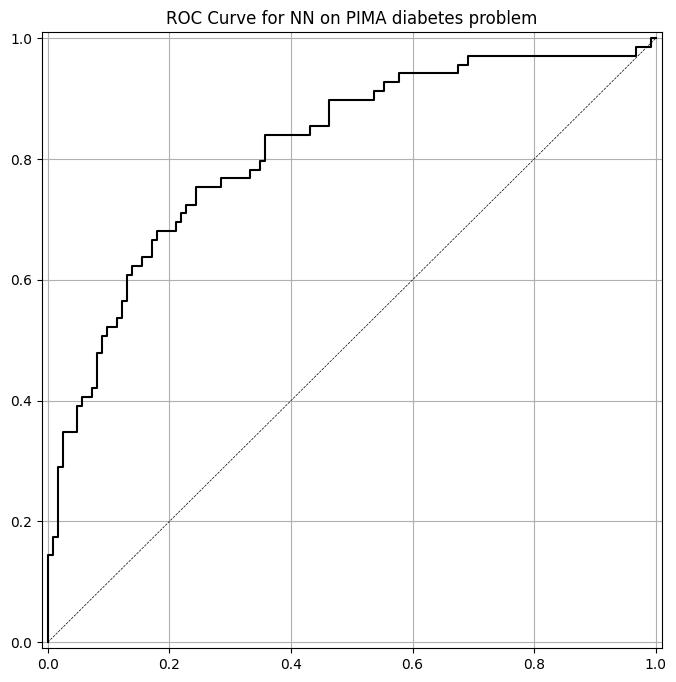

In [24]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [25]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

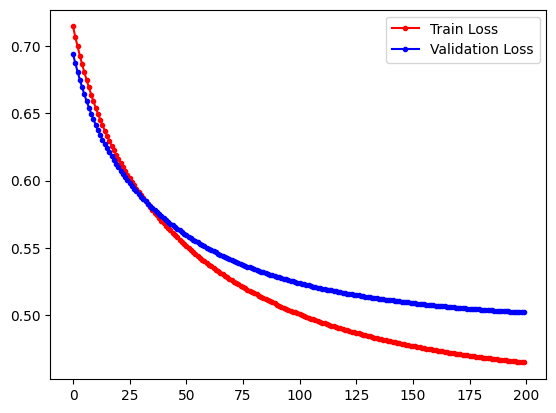

In [26]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

> The curve shows a balance of Train Loss and Validation loss up to 200 epochs, but the trend suggests that the validation loss is slowly increasing if the epoch is increased. The sweet spot is around 150 to 200 epochs, adding more will cause in overfitting.

# Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

## Loading the dataset


In [34]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
df = pd.read_csv(filepath, names=names)

In [35]:
X = df.iloc[:, :-1].values
y = df["has_diabetes"].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [37]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

## Build a model with two hidden layers, each with 6 nodes

In [38]:
model2  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

## Use a learning rate of .003 and train for 1500 epochs

In [42]:
model2.compile(SGD(learning_rate = .003),
              "binary_crossentropy",
              metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train,
                       validation_data=(X_test_norm, y_test),
                       epochs=1500)


Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5643 - loss: 0.7014 - val_accuracy: 0.5781 - val_loss: 0.6893
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5605 - loss: 0.6982 - val_accuracy: 0.5885 - val_loss: 0.6833
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5505 - loss: 0.7025 - val_accuracy: 0.6146 - val_loss: 0.6778
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5589 - loss: 0.6992 - val_accuracy: 0.6198 - val_loss: 0.6726
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5884 - loss: 0.6832 - val_accuracy: 0.6302 - val_loss: 0.6678
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5954 - loss: 0.6751 - val_accuracy: 0.6302 - val_loss: 0.6633
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6108 - loss: 0.6625 - val_accuracy: 0.6406 - val_loss: 0.6591
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6133 - loss: 0.6550 - val_accuracy: 0

In [43]:
y_pred_prob_nn_2 = model2.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 >= 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


## Graph the trajectory of the loss functions, accuracy on both train and test set

In [44]:
run_hist_2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

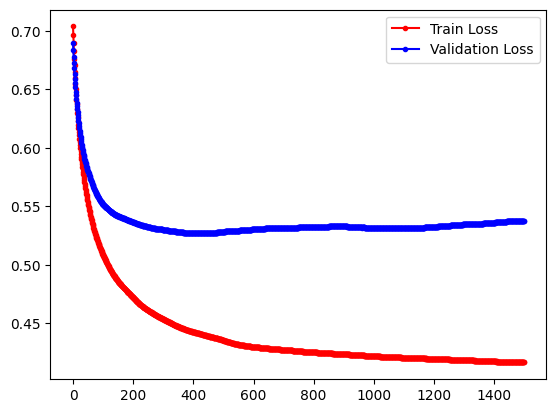

In [45]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

## Plot the roc curve for the predictions

accuracy is 0.719
roc-auc is 0.797


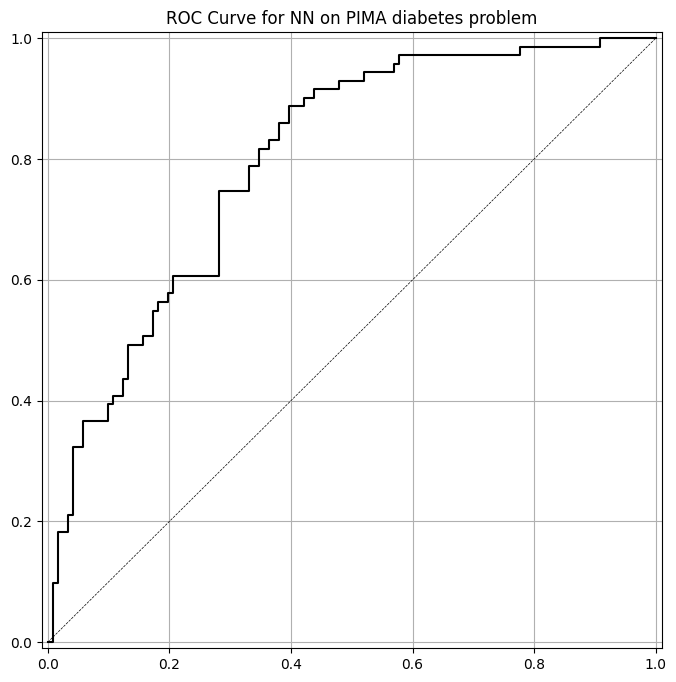

In [46]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

## Use different learning rates, numbers of epochs, and network structures.

## 1. Using 0.02, 400 epochs, and two hidden layers, each with 8 nodes

In [47]:
model2  = Sequential([
    Dense(8, input_shape=(8,), activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model2.compile(SGD(learning_rate = .02),
              "binary_crossentropy",
              metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train,
                       validation_data=(X_test_norm, y_test),
                       epochs=400)


Epoch 1/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3773 - loss: 0.8007 - val_accuracy: 0.5104 - val_loss: 0.6924
Epoch 2/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5611 - loss: 0.6866 - val_accuracy: 0.6510 - val_loss: 0.6402
Epoch 3/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6457 - loss: 0.6481 - val_accuracy: 0.7083 - val_loss: 0.6073
Epoch 4/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7308 - loss: 0.5948 - val_accuracy: 0.7500 - val_loss: 0.5850
Epoch 5/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7122 - loss: 0.5757 - val_accuracy: 0.7604 - val_loss: 0.5689
Epoch 6/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7081 - loss: 0.5735 - val_accuracy: 0.7552 - val_loss: 0.5568
Epoch 7/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7467 - loss: 0.5387 - val_accuracy: 0.7552 - val_loss: 0.5472
Epoch 8/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6982 - loss: 0.5534 - val_accuracy: 0.7500 - 

In [50]:
y_pred_prob_nn_2 = model2.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 >= 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


## Graph the trajectory of the loss functions, accuracy on both train and test set

In [51]:
run_hist_2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

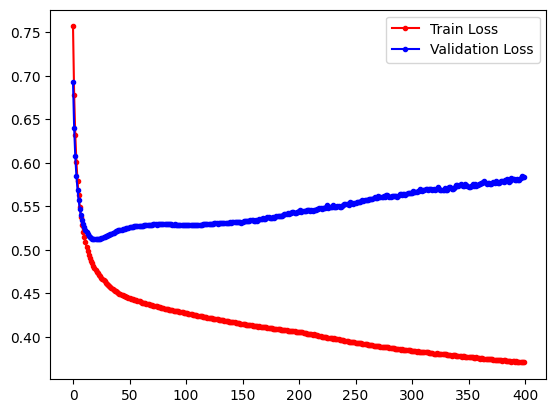

In [52]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

## Plot the roc curve for the predictions

accuracy is 0.734
roc-auc is 0.791


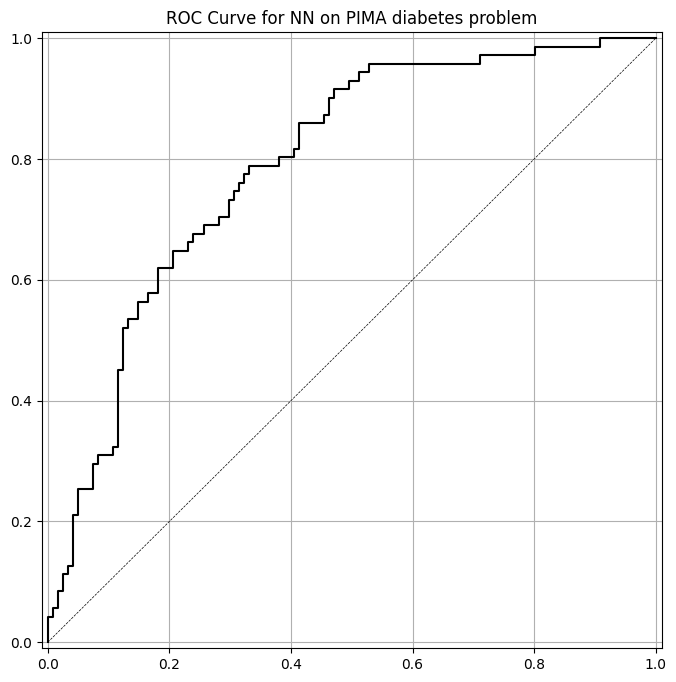

In [53]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

## 2. Using 0.0003, 400 epochs, and one hidden layer, each with 12 nodes

In [81]:
model2  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
model2.compile(SGD(learning_rate = .0006),
              "binary_crossentropy",
              metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train,
                       validation_data=(X_test_norm, y_test),
                       epochs=400)


Epoch 1/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4403 - loss: 0.7640 - val_accuracy: 0.4844 - val_loss: 0.7203
Epoch 2/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4345 - loss: 0.7766 - val_accuracy: 0.4948 - val_loss: 0.7184
Epoch 3/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4386 - loss: 0.7677 - val_accuracy: 0.5052 - val_loss: 0.7165
Epoch 4/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4466 - loss: 0.7711 - val_accuracy: 0.5104 - val_loss: 0.7147
Epoch 5/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4665 - loss: 0.7633 - val_accuracy: 0.5260 - val_loss: 0.7129
Epoch 6/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4495 - loss: 0.7671 - val_accuracy: 0.5417 - val_loss: 0.7110
Epoch 7/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4905 - loss: 0.7440 - val_accuracy: 0.5417 - val_loss: 0.7093
Epoch 8/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4769 - loss: 0.7412 - val_accuracy: 0.5573 - 

In [84]:
y_pred_prob_nn_2 = model2.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 >= 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


## Graph the trajectory of the loss functions, accuracy on both train and test set

In [85]:
run_hist_2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

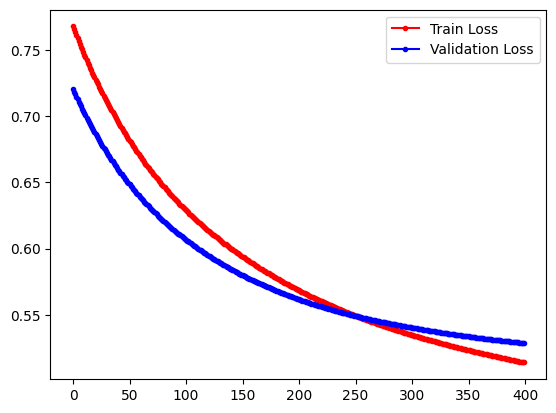

In [86]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

## Plot the roc curve for the predictions

accuracy is 0.599
roc-auc is 0.558


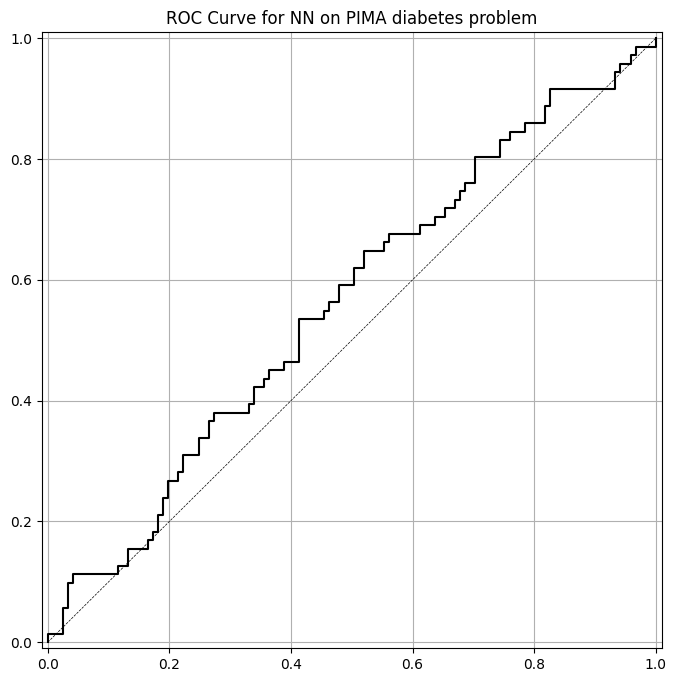

In [80]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

## Interpretation

> From what I have observed here, when I increased the learning rate the amount of epoch it takes to reach its local minima is quickly reached while, with lower learning rate, it takes more epoch to reach it. When I also added more nodes to the layer, the training and validation loss became erratic until it becomes steady. It seems that there is a common denominator for all my three tests, all the curves have similar gap value. I think the test data is not enough for the model to learn better.

# Conclusion

> In this lab activity, I was able to train neural networks and plot the performance of the model using Keras. The procedures guided me on the process of creating neural networks like building the hidden layers, nodes, and output layers. This process was not completely new to me since, we have been doing machine learning in Data Science 2. The only novel thing here is the creation of the layers of the neural network. In the supplementary activity, I was able to experiment on how the network layout and learning rate affects the neural network model performance. I was able to understand how learning rate and network layout complexity affects the overall performance of the model over epoch. Overall this activity helped me gauge on how neural networks parameters work.